# Projet Intelligence Artificielle

Neil Desplats - Arthur Pinto Rosa - Hadrien Eyraud


Ce rapport est également disponible au [format `ipynb`](https://raw.githubusercontent.com/imneedle/projet-ia/main/report/rapport.ipynb), sur notre [dépôt git](https://github.com/imneedle/projet-ia). Il contient le code et l'infrastructure permettant de regénérer la connaissance. Il est nécessaire d'exécuter le dernier bloc de code depuis le dépôt, car il utilise notre arborescence de scripts python (il est recommandé d'avoir Python 3.11)

# Prediction de la qualité de l'air à Grenoble

## Présentation du problème

La pollution de l'air représente un défi majeur dans de nombreuses villes à travers le monde, Grenoble étant un exemple illustratif. Bien que divers indicateurs soient utilisés pour évaluer la qualité de l'air, les modèles actuels ne couvrent souvent qu'un seul aspect, tel que les particules fines, les oxydes d'azote, l'ozone, ou le monoxyde de carbone. Cette étude s'appuie sur l'article suivant : https://www.sciencedirect.com/science/article/abs/pii/S1352231010003821

### Pourquoi l'Intelligence Artificielle est Indispensable

L'utilisation de l'intelligence artificielle se justifie par la complexité inhérente à la prédiction de la qualité de l'air, qui ne peut être pleinement appréhendée par une simple approche statistique. Voici quelques raisons majeures :

1. Relations Non Linéaires

Les relations entre les différents indicateurs de qualité de l'air, les conditions météorologiques et les caractéristiques urbaines sont souvent non linéaires et complexes. L'IA est capable de capturer ces relations subtiles, là où les modèles statistiques classiques pourraient échouer.

2. Adaptabilité Dynamique

La qualité de l'air évolue de manière dynamique en fonction de divers facteurs. L'IA peut s'adapter et apprendre des modèles évolutifs, permettant ainsi une meilleure anticipation des changements rapides, contrairement à des modèles statistiques qui pourraient manquer de flexibilité.

3. Gestion de Données Hétérogènes

Les données sur la qualité de l'air, les prévisions météorologiques et les caractéristiques urbaines peuvent être hétérogènes et volumineuses. L'IA excelle dans la gestion et l'analyse de ces données complexes, fournissant ainsi une vision intégrée.

4. Facteurs Cachés

Certains facteurs influençant la qualité de l'air peuvent être cachés ou difficilement détectables par des approches statistiques traditionnelles. L'IA peut identifier des schémas subtils et des corrélations non évidentes, améliorant ainsi la précision des prédictions.

### Objectif du Projet

Nous souhaitons développer une solution  basée sur l'intelligence artificielle pour prédire la qualité de l'air à court terme dans la ville de Grenoble. En combinant la puissance de l'IA avec des données météorologiques et de pollution, nous visons à créer un modèle adaptable et holistique, allant au-delà des limites des approches statistiques conventionnelles.

## Jeu de données

### Données Météorologiques

Nous avons exploité les données de l'API OpenWeatherMap pour recueillir des informations météorologiques détaillées sur Grenoble. Ces données comprennent des paramètres tels que l'humidité, le point de rosée, la température moyenne, la vitesse et la direction du vent, etc. Cette approche nous a permis de constituer un ensemble de données riche et diversifié, couvrant une période étendue de plus d'un an et demi. La qualité de ces données météorologiques est cruciale pour établir des relations significatives entre les conditions météorologiques et la qualité de l'air.

### Données de Qualité de l'Air

Les données sur la qualité de l'air, essentielles à notre modèle, ont été obtenues à partir de l'API OpenMétéo. Ces données comprennent une variété de polluants atmosphériques tels que les particules fines, le monoxyde de carbone, le monoxyde d'azote, et d'autres. Nous avons récupéré des informations détaillées spécifiquement pour Grenoble sur une période similaire, soit plus d'un an et demi. Cette approche nous offre une vision complète de la pollution atmosphérique, permettant une modélisation robuste prenant en compte plusieurs polluants.

### Expérience Antérieure Réussie

Une expérience préliminaire menée à Louisville a montré des résultats prometteurs en utilisant les données météorologiques et les particules fines 24 heures en amont du vent. Forts de ces résultats positifs, nous étendons désormais notre approche pour inclure d'autres polluants et enrichir davantage notre ensemble de données. Cette expansion vise à renforcer la capacité de notre modèle à anticiper la qualité de l'air dans diverses conditions atmosphériques et environnementales.

### Objectif d'Entraînement du Modèle

L'ensemble de données ainsi constitué, couvrant une période significative et incluant une diversité de paramètres, servira à entraîner notre modèle d'intelligence artificielle. L'objectif est de permettre à notre modèle de comprendre les relations complexes entre les différentes variables météorologiques, les caractéristiques urbaines et les niveaux de pollution, afin de réaliser des prédictions précises et adaptées à Grenoble, et éventuellement, à d'autres villes. L'indice de qualité de l'air prend en compte différents composants : le dioxyde de souffre, le dioxyde d'azote, l'ozone, le monoxyde de carbone et les particules fines dont le diamètre est inférieur à 10 µm et 2.5 µm. Les valeurs sont toujours comprises entre 1 et 5. Le tableau suivant (qui provient du site de open-weather https://openweathermap.org/api/air-pollution) indique à quoi correspond chaque valeur.

![](https://cdn.discordapp.com/attachments/1158323140666081330/1199012529184198666/image.png?ex=65c0fe6f&is=65ae896f&hm=df5031455c75523a09fc6794ecc6384114648cf858c5caa9081561f46be801ba&)


## Génération des Connaissances

### Utilisation d'APIs Publiques

Notre approche repose sur l'utilisation de deux APIs publiques, OpenWeatherMap et OpenMétéo, pour collecter des données météorologiques et de qualité de l'air spécifiques à Grenoble. Cependant, en raison des restrictions quant au nombre d'appels quotidiens autorisés par ces APIs, nous avons dû élaborer une stratégie intelligente pour récupérer un jeu de données étendu sur la dernière année et demi.

### Stratégie de Récupération de Données

En raison des limitations de fréquence d'appels, nous avons mis en place un processus de récupération de données qui s'adapte aux contraintes imposées par les APIs. Plutôt que de chercher à récupérer toutes les données en une seule fois, nous avons opté pour des requêtes quotidiennes, travaillant avec la contrainte de nombre d'appels par jour.

### Automatisation avec Crontab

Pour implémenter notre stratégie de récupération, nous avons utilisé la planification de tâches à l'aide de la crontab. Un script de récupération de données a été configuré pour s'exécuter automatiquement à des intervalles réguliers, relançant le processus de collecte de données chaque jour. Cette approche nous a permis de rester dans les limites de requêtes autorisées tout en accumulant progressivement un jeu de données complet sur une période étendue.

### Agrégation des Données

À chaque exécution du script, les nouvelles données récupérées quotidiennement ont été ajoutées à notre ensemble de données principal. Cela a conduit à une accumulation graduelle et régulière de données météorologiques et de qualité de l'air sur plus de 500 jours. Cette méthode nous a permis de contourner les limitations tout en garantissant une couverture temporelle significative pour l'entraînement de notre modèle.

### Avantages de l'Approche

1. **Respect des Limites :** En respectant les limites d'appels quotidiens, nous avons assuré une utilisation éthique et conforme des APIs publiques.
   
2. **Intégration Continue :** L'automatisation du processus avec la crontab a facilité une intégration continue des nouvelles données dans notre ensemble existant, garantissant une mise à jour régulière et une couverture temporelle étendue.

3. **Évolutivité :** Cette méthode évolutive nous a permis de construire un ensemble de données robuste sur une période prolongée, crucial pour l'entraînement efficace de notre modèle prédictif.

### Conclusion pour récupération des connaissances générées

La combinaison de l'automatisation, de la planification régulière des tâches et de la gestion intelligente des quotas d'API a été essentielle pour générer un jeu de données significatif et fiable, posant ainsi les bases d'une modélisation précise de la qualité de l'air à Grenoble.

En raison de cette approche, il n'est pas possible de fournir directement un script pour récupérer les connaissances accumulées sur plus de 500 jours en raison des contraintes d'API. Cependant, nous mettons à disposition le [jeu de données résultant au format CSV](https://github.com/imneedle/projet-ia/tree/main/data/training.csv). Nous offrons également la présentation de notre [script de récupération](https://github.com/imneedle/projet-ia/blob/main/src/api/local_data.py), illustrant le processus suivi pour générer cette base de connaissances étendue.

## Recherche du meilleur modèle

Pour déterminer le meilleur modèle pour notre projet, nous avons effectué une revue de littérature sur divers algorithmes d'apprentissage automatique utilisés pour la prédiction de la qualité de l'air.

L'un des avantages de KNN est sa simplicité et sa facilité de mise en œuvre. C'est un algorithme non paramétrique qui ne fait aucune hypothèse sur la distribution sous-jacente des données. Au lieu de cela, il s'appuie sur la proximité des points de données pour faire des prédictions. Cela rend KNN adapté pour capturer des relations complexes et non linéaires entre les indicateurs de qualité de l'air et les variables météorologiques.

De plus, KNN est un algorithme polyvalent qui peut gérer à la fois les tâches de régression et de classification. Dans notre cas, nous sommes intéressés par la prédiction de l'indice de qualité de l'air (AQI), qui est une variable continue. KNN peut être facilement adapté aux tâches de régression en moyennant les valeurs des k plus proches voisins.

Ces avantages ont également étés présentés par Pochai et al. (2023), qui ont publié des travaux sur la prédiction des niveaux de PM2.5 grâce à KNN pendant que nous commencions ces travaux.

Sur la base de cette revue de littérature et de l'adéquation de KNN pour notre tâche de régression, nous avons décidé d'explorer ses performances dans notre projet. Cependant, il est important de noter que le choix du meilleur modèle dépend finalement des caractéristiques spécifiques de l'ensemble de données et du problème en question. Par conséquent, nous comparerons les performances de KNN avec d'autres algorithmes d'apprentissage automatique pour déterminer le meilleur modèle pour notre tâche de prédiction de la qualité de l'air.

In [101]:
import sys
import os
from datetime import datetime
sys.path.append(os.path.join(os.path.abspath('../')))

import requests
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt


from src.api.api import Api
from src.api.pollution_api import PollutionApi
from src.api.future_pollution import FuturePollutionApi
from src.api.predicted_weather import PredictedWeatherApi
from src.util.position_offsetter import PositionOffsetter

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron

In [102]:
data = pd.read_csv('../data/training.csv')

data.drop(columns=['time'], inplace=True)

train_df, test_df = train_test_split(data, test_size=0.3)

train_df = train_df.dropna()
test_df = test_df.dropna()

train_df = train_df.reset_index(drop=True)
train_df.drop(columns=['co','no','no2','o3','so2','pm2_5','pm10','nh3'], inplace=True)
test_df = test_df.reset_index(drop=True)
test_df.drop(columns=['co','no','no2','o3','so2','pm2_5','pm10','nh3'], inplace=True)

stats={}

In [103]:
n_neighbors = range(1, 16)

maes = []
rmses = []
training_times = []
prediction_times = []

for k in n_neighbors:

    start_time = time.time()

    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

    end_time = time.time()
    training_time = end_time - start_time

    start_time = time.time()    
    predictions = knn_model.predict(test_df.drop(columns=['aqi']))
    end_time = time.time()
    prediction_time = end_time - start_time
    
    maes.append(np.mean(np.abs(predictions - test_df['aqi'])))
    rmses.append(np.sqrt(np.mean((predictions - test_df['aqi'])**2)))
    training_times.append(training_time)
    prediction_times.append(prediction_time)


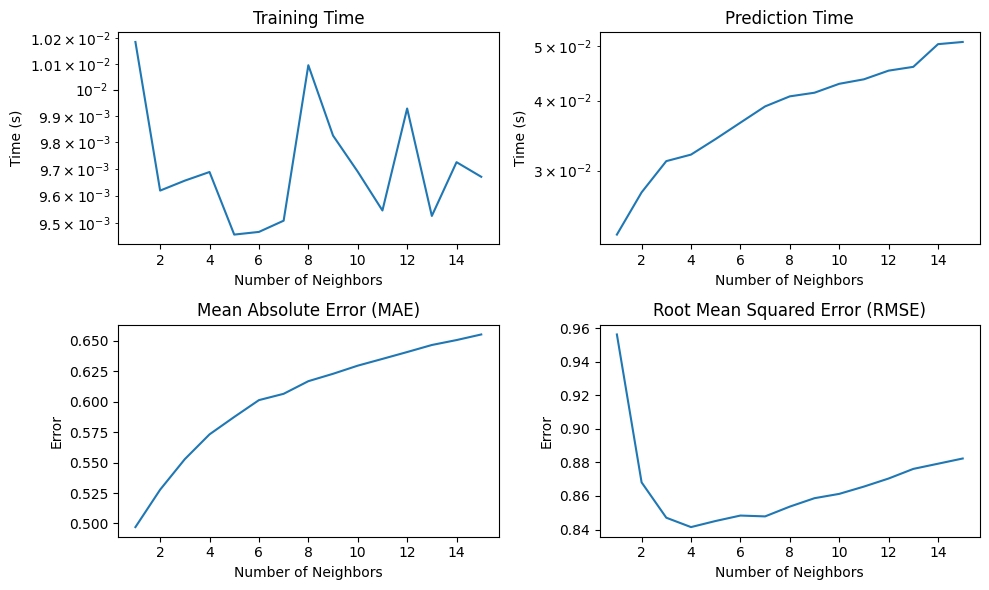

In [104]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(n_neighbors, training_times)
plt.title('Training Time')
plt.xlabel('Number of Neighbors')
plt.ylabel('Time (s)')
plt.yscale('log')

plt.subplot(2, 2, 2)
plt.plot(n_neighbors, prediction_times)
plt.title('Prediction Time')
plt.xlabel('Number of Neighbors')
plt.ylabel('Time (s)')
plt.yscale('log')

plt.subplot(2, 2, 3)
plt.plot(n_neighbors, maes)
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')

plt.subplot(2, 2, 4)
plt.plot(n_neighbors, rmses)
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')

plt.tight_layout()
plt.show()


### Comparaison avec d'autres modèles

Nous avons constaté que le meilleur choix pour le nombre de voisins est aux alentours de 4 ou 5. Nous avons donc pris la décision d'utiliser 4 voisins.

Afin de vérifier que ce modèle permet une bonne précision, nous comparerons KNN à d'autres modèles qui nous semblaient appropriés pour cette tâche : 
- Random Forest
- Gradient Boosting
- AdaBoost
- Multi-layer Perceptron

Nous avons aussi séléctionné deux modèles qui nous semblaient moins adapté, pour vérifier si les autres algorithmes étaient effectivement meilleurs :
- Gaussian Naive Bayes
- Perceptron

Les scripts suivants montrent nos efforts de recherche.


In [105]:
start_time = time.time()

knn_model = KNeighborsRegressor(n_neighbors=4)
knn_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()

training_time = end_time - start_time

start_time = time.time()

predictions = knn_model.predict(test_df.drop(columns=['aqi']))

end_time = time.time()

prediction_time = end_time - start_time

model = "KNeighborsRegressor"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [106]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'KNeighborsRegressor'
training_time = 0.010945796966552734
prediction_time = 0.03841972351074219
Mean Absolute Error (MAE): 0.5731961448293826
Root Mean Squared Error (RMSE): 0.8414448494991412
Coefficient of Determination (R-squared): 0.5399757092521873
Mean Absolute Percentage Error (MAPE): 32.17070417643483
      Expected Value  Predicted Value
2986             2.0             1.50
3545             2.0             2.00
2948             3.0             2.00
2162             1.0             1.00
1134             2.0             2.50
838              5.0             4.00
3511             2.0             2.25
3240             4.0             4.00
3595             1.0             1.00
770              1.0             1.75
2640             2.0             1.75
1253             1.0             1.50
1046             1.0             1.00
2811             1.0             1.00
1090             2.0             1.75


In [107]:
start_time = time.time()

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()
training_time = end_time - start_time

start_time = time.time()
predictions = rf_model.predict(test_df.drop(columns=['aqi']))
end_time = time.time()
prediction_time = end_time - start_time

model = "RandomForestRegressor"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [108]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'RandomForestRegressor'
training_time = 4.301955699920654
prediction_time = 0.03296065330505371
Mean Absolute Error (MAE): 0.5012503256056265
Root Mean Squared Error (RMSE): 0.6912617243527176
Coefficient of Determination (R-squared): 0.689533695514168
Mean Absolute Percentage Error (MAPE): 29.523447946513848
      Expected Value  Predicted Value
2335             2.0             1.76
3166             2.0             1.97
2962             2.0             2.10
674              2.0             1.40
790              1.0             1.60
3118             2.0             2.49
753              2.0             2.01
1495             2.0             1.70
1838             1.0             1.95
2595             4.0             3.13
1023             3.0             3.08
2573             2.0             2.00
1620             1.0             1.02
3452             3.0             2.55
2503             1.0             1.15


In [109]:
start_time = time.time()

gb_model = GradientBoostingRegressor()
gb_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()
training_time = end_time - start_time

start_time = time.time()

predictions = gb_model.predict(test_df.drop(columns=['aqi']))
end_time = time.time()
prediction_time = end_time - start_time

model = "GradientBoostingRegressor"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [110]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'GradientBoostingRegressor'
training_time = 1.540764570236206
prediction_time = 0.0049457550048828125
Mean Absolute Error (MAE): 0.6235652190551376
Root Mean Squared Error (RMSE): 0.8279669633742375
Coefficient of Determination (R-squared): 0.5545946099640152
Mean Absolute Percentage Error (MAPE): 36.31017589190871
      Expected Value  Predicted Value
237              2.0         1.820735
1724             2.0         3.093816
470              4.0         4.292131
1787             2.0         3.173529
3255             3.0         2.930515
2292             2.0         1.893754
2308             1.0         1.222967
1917             4.0         2.746640
2854             3.0         2.420896
309              4.0         3.063257
1492             1.0         1.607984
2810             3.0         1.997461
1895             1.0         2.425579
1668             2.0         3.149690
1381             1.0         3.261853


In [111]:
start_time = time.time()

ada_model = AdaBoostRegressor()
ada_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()
training_time = end_time - start_time

start_time = time.time()

predictions = ada_model.predict(test_df.drop(columns=['aqi']))

end_time = time.time()
prediction_time = end_time - start_time

model = "AdaBoostRegressor"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [112]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'AdaBoostRegressor'
training_time = 0.30857396125793457
prediction_time = 0.0049896240234375
Mean Absolute Error (MAE): 0.8427597320531374
Root Mean Squared Error (RMSE): 0.9877608487147982
Coefficient of Determination (R-squared): 0.36608202269683965
Mean Absolute Percentage Error (MAPE): 56.275800186440314
      Expected Value  Predicted Value
1140             1.0         1.930464
433              1.0         1.900685
3405             2.0         2.463076
3093             3.0         2.523906
590              2.0         1.473822
3378             1.0         1.473822
954              1.0         2.651076
2664             3.0         2.257837
1164             1.0         2.923828
2186             4.0         3.317097
295              2.0         2.884120
966              2.0         3.193452
2433             2.0         2.017766
1973             1.0         2.039348
3788             2.0         1.784278


In [113]:
start_time = time.time()

mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()
training_time = end_time - start_time

start_time = time.time()

predictions = mlp_model.predict(test_df.drop(columns=['aqi']))

end_time = time.time()
prediction_time = end_time - start_time

model = "MLPRegressor"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [114]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'MLPRegressor'
training_time = 3.2563676834106445
prediction_time = 0.0026891231536865234
Mean Absolute Error (MAE): 0.82622856750406
Root Mean Squared Error (RMSE): 1.035642298462064
Coefficient of Determination (R-squared): 0.30313442448220884
Mean Absolute Percentage Error (MAPE): 54.6069287321063
      Expected Value  Predicted Value
143              1.0         0.989394
2879             1.0         1.708079
2763             2.0         2.588364
647              1.0         1.730128
175              2.0         2.770358
1455             1.0         3.663144
641              1.0         2.072140
662              2.0         1.536610
1052             1.0         1.933432
2017             1.0         1.520382
329              1.0         1.943992
2573             2.0         2.966541
2154             2.0         1.974803
670              2.0         1.894009
3138             4.0         3.619147


In [115]:
start_time = time.time()

nb_model = GaussianNB()
nb_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()
training_time = end_time - start_time

start_time = time.time()

predictions = nb_model.predict(test_df.drop(columns=['aqi']))

end_time = time.time()
prediction_time = end_time - start_time

model = "GaussianNB"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [116]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'GaussianNB'
training_time = 0.004063129425048828
prediction_time = 0.0017669200897216797
Mean Absolute Error (MAE): 0.758791351914561
Root Mean Squared Error (RMSE): 1.2525566456492263
Coefficient of Determination (R-squared): -0.01935205451334121
Mean Absolute Percentage Error (MAPE): 32.38516974906659
      Expected Value  Predicted Value
2911             1.0              1.0
657              2.0              1.0
1288             1.0              2.0
2534             3.0              1.0
1235             4.0              3.0
1140             1.0              1.0
659              4.0              2.0
1098             1.0              1.0
2045             4.0              1.0
1391             1.0              1.0
1706             4.0              2.0
256              5.0              2.0
73               4.0              2.0
887              1.0              1.0
901              2.0              1.0


In [117]:
start_time = time.time()

perceptron_model = Perceptron()
perceptron_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()
training_time = end_time - start_time

start_time = time.time()

predictions = perceptron_model.predict(test_df.drop(columns=['aqi']))

end_time = time.time()
prediction_time = end_time - start_time

model = "Perceptron"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [118]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'Perceptron'
training_time = 0.02215123176574707
prediction_time = 0.0014705657958984375
Mean Absolute Error (MAE): 0.8119301901536858
Root Mean Squared Error (RMSE): 1.2973011840253044
Coefficient of Determination (R-squared): -0.09348059508728168
Mean Absolute Percentage Error (MAPE): 37.62655205348615
      Expected Value  Predicted Value
325              1.0              1.0
1121             1.0              1.0
3184             1.0              1.0
693              1.0              1.0
3762             1.0              1.0
3363             2.0              4.0
2661             2.0              1.0
3812             3.0              4.0
1735             1.0              1.0
2782             1.0              1.0
3818             1.0              1.0
1000             4.0              4.0
2965             1.0              1.0
1022             1.0              1.0
2865             1.0              1.0


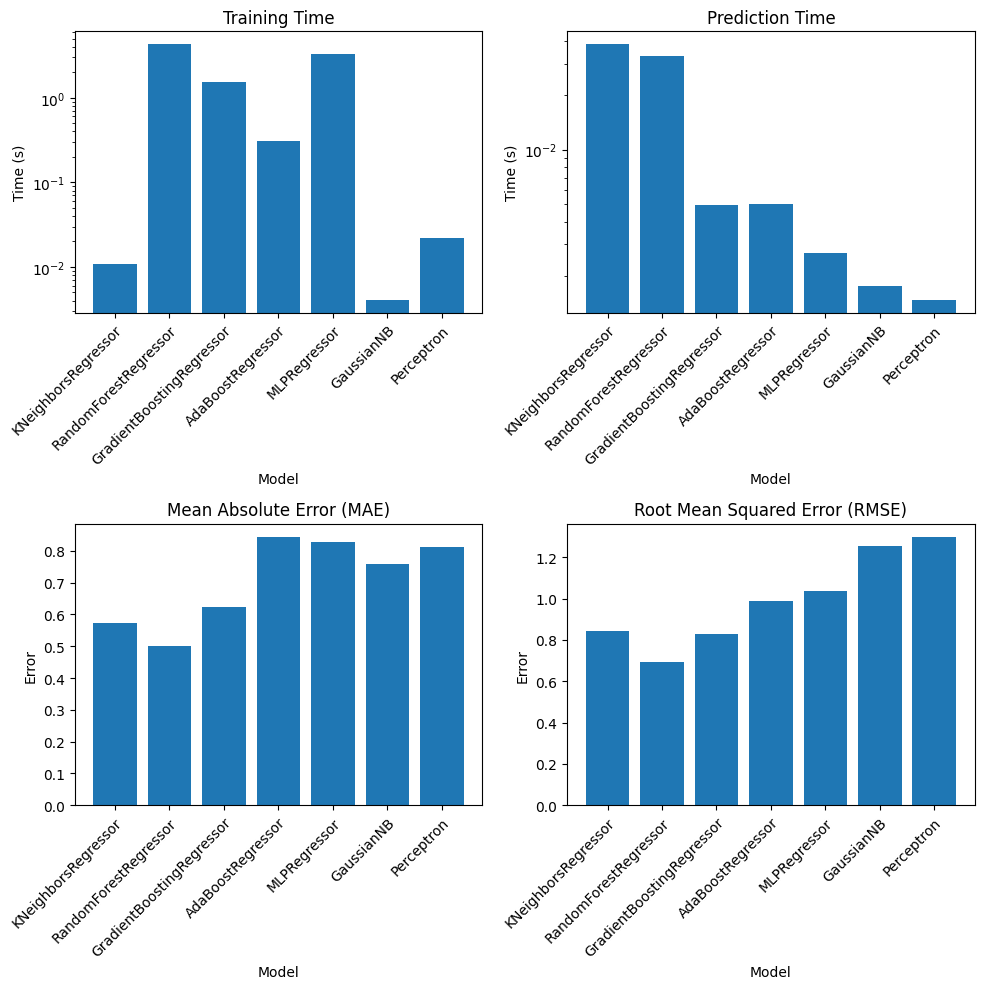

In [119]:
models = list(stats.keys())
training_times = [stats[model]['training_time'] for model in models]
prediction_times = [stats[model]['prediction_time'] for model in models]
maes = [stats[model]['mae'] for model in models]
rmses = [stats[model]['rmse'] for model in models]
r_squareds = [stats[model]['r_squared'] for model in models]
mapes = [stats[model]['mape'] for model in models]

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.bar(models, training_times)
plt.title('Training Time')
plt.xlabel('Model')
plt.ylabel('Time (s)')
plt.yscale('log')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

plt.subplot(2, 2, 2)
plt.bar(models, prediction_times)
plt.title('Prediction Time')
plt.xlabel('Model')
plt.ylabel('Time (s)')
plt.yscale('log')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

plt.subplot(2, 2, 3)
plt.bar(models, maes)
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Model')
plt.ylabel('Error')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

plt.subplot(2, 2, 4)
plt.bar(models, rmses)
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Model')
plt.ylabel('Error')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

plt.tight_layout()
plt.show()


### Discussion sur la qualité des modèles évalués

Nous constatons que les modèles que nous avons choisis pour leur qualité sont effectivement meilleurs que les autres. KNN fournit des résultats plutôt précis en comparaison aux autres modèles, mais ce n'est pas le meilleur. Random Forest et Gradient Boosting sont légèrement meilleurs.

L'erreur est acceptable pour donner une indication de la pollution de l'air, mais n'est pas assez précise pour des domaines ou cela serait important.

## Évaluation des aspects environnementaux et sociétaux

Nous avons réalisé des mesures significatives de l'impact environnemental de notre projet d'intelligence artificielle en utilisant la bibliothèque Python CarbonTracker. Ces mesures ont été effectuées tant pendant la phase d'entraînement du modèle que lors de la phase de prédiction. Les résultats, présentés dans le tableau ci-dessous, sont exprimés en termes d'équivalent en mètres parcourus en voiture, une unité couramment utilisée pour quantifier les émissions de carbone. Les autres chiffres indiqués correspondent aux grammes de CO2 produits lors du fonctionnement. Le calcul de l'équivalent CO2 utilise la valeur de 58.48 gCO2/kWh, qui correspond à l'intensité moyenne à Grenoble en 2021. On admet que le modèle sera beaucoup moins entraîné qu'il ne fera de prédictions (d'où le facteur 1000 entre les 2). La machine de test est dotée d'un processeur AMD Ryzen 7 à 8 cœurs.

|    Modèle              | Entrainement (x10) | Equivalent en mètres parcourus en voiture | Prédiction (x 10000) | Equivalent en mètres parcourus en voiture |
|:------------------------:|:--------------------:|:-------------------------------------------:|:----------------------:|:-------------------------------------------:|
| KNN                    | ~0                 | ~0                                        | 0.442                | 4.11                                      |
| Random Forest          | 0.0411             | 0.383                                     | 0.222                | 2.07                                      |
| Gradient Boost         | 0.0466             | 0.434                                     | 0.100                | 0.930                                     |
| Ada Boost              | 0.00978            | 0.0910                                    | 0.173                | 1.61                                      |
| Multi-layer Perceptron | 0.0402             | 0.374                                     | 0.325                | 3.02                                      |
| Gaussian               | 0.000135           | 0.00125                                   | 0.101                | 0.942                                     |
| Perceptron             | 0.000684           | 0.00637                                   | ~0                   | ~0                                        |

### Analyse de l'Impact Environnemental

1. Entraînement du Modèle

Les modèles KNN, Gaussian et Perceptron présentent des impacts environnementaux minimes lors de la phase d'entraînement, s'approchant de zéro équivalent en mètres parcourus en voiture.
Les modèles Random Forest, Gradient Boost, et Multi-layer Perceptron présentent des impacts plus significatifs. 

2. Prédiction avec le Modèle

Le modèle KNN affiche un impact de prédiction plus élevé par rapport à son entraînement, avec un équivalent en mètres parcourus en voiture de 4.11.
Le modèle Perceptron montre la plus grande efficacité environnementale lors de la phase de prédiction, avec un impact minimal approximé à 0.

3. Choix du Modèle en Termes d'Impact Environnemental

En considérant l'ensemble des modèles, le Perceptron se distingue par son impact environnemental relativement bas, tant pendant l'entraînement que la prédiction.
Cependant, il est essentiel de noter que le choix du modèle optimal ne doit pas se faire uniquement sur la base de l'impact environnemental, mais également en prenant en compte la précision et la performance du modèle dans la résolution du problème spécifique de qualité de l'air. Ainsi, il est recommandé de trouver un équilibre entre l'efficacité environnementale et les performances du modèle. En tenant compte de ces 2 critères, le perceptron, qui à des prédictions trop biaisées par rapport à la réalité ne peut-être sélectionné.

### Impact Sociétal du Projet

Notre projet d'intelligence artificielle visant à prédire la qualité de l'air présente également des implications sociétales qui méritent d'être évaluées. Voici une analyse de l'impact potentiel de notre projet sur la société :

1. Amélioration de la Santé Publique

En anticipant la qualité de l'air, notre modèle offre la possibilité aux autorités locales et aux résidents de prendre des mesures préventives en cas de niveaux de pollution élevés. Cela peut contribuer à réduire les risques sanitaires associés à la pollution de l'air, améliorant ainsi la santé globale de la population.

2. Urbanisme Durable

Les données météorologiques et de qualité de l'air collectées peuvent être utilisées pour orienter les décisions d'urbanisme vers des solutions plus durables et respectueuses de l'environnement. Cela pourrait avoir un impact positif sur la planification urbaine en favorisant des politiques et des infrastructures qui réduisent la pollution atmosphérique.

3. Sensibilisation à la Pollution de l'Air

Notre projet peut contribuer à sensibiliser la population à la problématique de la pollution de l'air en fournissant des informations prédictives accessibles. Une meilleure compréhension des enjeux environnementaux peut conduire à des comportements individuels plus responsables et à des initiatives collectives en faveur de la qualité de l'air.

4. Prise de Décision Informée

Les données générées par notre modèle peuvent être utilisées par les autorités locales pour prendre des décisions informées en matière de gestion de la qualité de l'air. Cela inclut la mise en œuvre de mesures d'urgence, la planification de la circulation, et d'autres initiatives visant à réduire l'impact de la pollution atmosphérique.

5. Accessibilité aux Données Environnementales

En fournissant des données prédictives sur la qualité de l'air, notre projet contribue à rendre les informations environnementales plus accessibles au grand public. Cela renforce la transparence et l'engagement de la communauté dans les questions liées à l'environnement.

## Prédiction de la qualité de l'air selon les connaissances créées

Il nous est désormais possible de prédire la qualité de l'air grâce à nos modèles. Comme expliqué précédemment, nous utiliserons le modèle de Gradient Boosting. 

Les données de météorologie sont récupérées par les APIs mentionnées au début. Il est évidemment impossible de comparer les données prédites et réelles, mais nous nous baserons quand même sur les prédictions de OpenWeatherMap comme référence. Nous constatons que les prédictions ne sont pas parfaites, mais contrairement à celles d'OpenWeatherMap, elles ne nécéssitent pas de faire une simulation à grande échelle des polluants.

In [120]:
from datetime import datetime, timedelta
from tracemalloc import start
# Set position to Grenoble
lat, lon = 45.185992, 5.734384
start_date = datetime.now().replace(minute=0, second=0, microsecond=0) + timedelta(hours=1)
end_date = datetime.now().replace(minute=0, second=0, microsecond=0) + timedelta(hours=25)

appid = "3f4dd805354d2b0a8aaf79250d2b44fe"

pollution_api = PollutionApi()
future_pollution_api = FuturePollutionApi()
weather_api = PredictedWeatherApi()

# Get weather data at position
weather_df = weather_api.get_dataframe({
    "latitude": lat, "longitude": lon,
    "latitude": lat, "longitude": lon,
    "start_date": start_date.strftime('%Y-%m-%d'),
    "end_date": end_date.strftime('%Y-%m-%d'),
    "hourly": ["temperature_2m", "relative_humidity_2m", "precipitation", "dewpoint_2m", "wind_speed_10m", "wind_direction_10m"],
})

# Get pollution data for offsetted wind position 24h before (now)
wind_df = weather_api.get_dataframe({
    "latitude": lat, "longitude": lon,
    "start_date": start_date.strftime('%Y-%m-%d'),
    "end_date": end_date.strftime('%Y-%m-%d'),
    "hourly": ["wind_speed_100m", "wind_direction_100m"],
})
wind_speed = wind_df['wind_speed_100m'][0]
wind_direction = wind_df['wind_direction_100m'][0]

offsetter = PositionOffsetter(lat, lon)
offsetter.offset(wind_speed, wind_direction, .5)
offsetted_lat, offsetted_lon = offsetter.lat, offsetter.lon

offsetted_df = pollution_api.get_dataframe({
    "lat": offsetted_lat, "lon": offsetted_lon,
    "start": int((start_date - timedelta(hours=23)).timestamp()), "end": int((end_date - timedelta(hours=24)).timestamp()),
    "appid": appid
})
offsetted_df = offsetted_df.rename(columns=lambda a: f'{a}_offset')

offsetted_df.index += timedelta(hours=24)

# Combine the data at position with the data at offsetted position
combined_df = pd.concat([weather_df, offsetted_df], axis=1)
combined_df = combined_df.dropna()

future_y = gb_model.predict(combined_df)
future_df = pd.DataFrame(future_y, columns=['aqi'])

predicted_df = future_pollution_api.get_dataframe({
    "lat": lat, "lon": lon,
    "appid": appid
})

print("timestamp", "our prediction", "reference prediction", sep="\t")
for i in range(24):
    print(predicted_df.index[i+1], round(future_y[i]), predicted_df['aqi'][i+1], sep="\t")

/tmp/ipykernel_27692/2638824545.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wind_speed = wind_df['wind_speed_100m'][0]
/tmp/ipykernel_27692/2638824545.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wind_direction = wind_df['wind_direction_100m'][0]


Data: {'coord': {'lon': 5.7344, 'lat': 45.186}, 'list': [{'main': {'aqi': 1}, 'components': {'co': 303.75, 'no': 0.1, 'no2': 10.88, 'o3': 45.78, 'so2': 1.24, 'pm2_5': 4.97, 'pm10': 6.26, 'nh3': 0.96}, 'dt': 1705935600}, {'main': {'aqi': 1}, 'components': {'co': 340.46, 'no': 0.05, 'no2': 15.25, 'o3': 39.34, 'so2': 1.31, 'pm2_5': 6.88, 'pm10': 8.17, 'nh3': 0.65}, 'dt': 1705939200}, {'main': {'aqi': 1}, 'components': {'co': 367.17, 'no': 0.04, 'no2': 18.68, 'o3': 33.26, 'so2': 1.37, 'pm2_5': 8.28, 'pm10': 9.68, 'nh3': 0.59}, 'dt': 1705942800}, {'main': {'aqi': 1}, 'components': {'co': 387.19, 'no': 0.05, 'no2': 19.71, 'o3': 31.47, 'so2': 1.52, 'pm2_5': 9.1, 'pm10': 10.69, 'nh3': 0.63}, 'dt': 1705946400}, {'main': {'aqi': 2}, 'components': {'co': 433.92, 'no': 0.07, 'no2': 21.76, 'o3': 28.61, 'so2': 1.91, 'pm2_5': 11.26, 'pm10': 13.16, 'nh3': 0.77}, 'dt': 1705950000}, {'main': {'aqi': 2}, 'components': {'co': 467.3, 'no': 0.08, 'no2': 22.96, 'o3': 25.75, 'so2': 2.21, 'pm2_5': 12.86, 'pm10

/tmp/ipykernel_27692/2638824545.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(predicted_df.index[i+1], round(future_y[i]), predicted_df['aqi'][i+1], sep="\t")


## Conclusion

L'utilisation de l'IA pour la prédiction de la qualité de l'air semble raisonnablement adapté aux usages où la précision n'est pas critique. Cependant, cette affirmation est à restreindre à ces cas. Pour des utilisations plus importantes, nous pensons que l'utilisation des modèles météorologiques actuels est à privilégier. Il faut bien sur prendre en compte l'utilisation énergétique plus importante de ces modèles par rapport à nos expérimentations.

Des recherches supplémentaires permettraient d'améliorer ce défrichage. Par exemple, il pourrait être intéressant de prendre en compte l'instant des points à prédire : l'heure de la journée, le jour de la semaine ou même le mois. La prédiction indépendante des facteurs pris en compte par l'index de qualité de l'air pourrait aussi amener à de meilleurs résultats. Cela permettrait également de calculer des index différents sans réentrainer les modèles. Cela pourrait toutefois amener à une plus importante consommation énergétique.

Il pourrait être envisageable d'entrainer ces modèles sur plus de données. De plus, la présence importante des années 2020 et 2021 (particulières à l'égard de la pollution de par la pandémie de CoViD-19), limite imposée par notre source, peut être cause de biais dans les données. Nonobstant, il faut aussi prendre en compte que la prise en compte des polluants est chaque année de plus en plus importante, et donc qu'il pourrait être néfaste de récupérer des données trop anciennes.


## Bibliographie

Pochai et al. *A PM2.5 Forewarning Algorithm Using k-Nearest Neighbors
Machine Learning at Changpuek, Chiang Mai, Thailand* (2023) (https://dl.acm.org/doi/pdf/10.1145/3625704.3625749)

Szymon Hoffman et al. *Air Quality Modeling with the Use of Regression Neural Networks* (2022) (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9779138/)

W. Geoffrey Cobourn *An enhanced PM2.5 air quality forecast model based on nonlinear regression and back-trajectory concentrations* (2010) (https://www.sciencedirect.com/science/article/abs/pii/S1352231010003821)

Modèles d'apprentissage supervisé de sci-kit https://scikit-learn.org/stable/supervised_learning.html

Calculateur de consommation d'un programme https://github.com/lfwa/carbontracker

Open Météo API Documentation (weather API) https://open-meteo.com/en/docs/ 

Open Weather Map API Documentation (air pollution API)https://openweathermap.org/api/air-pollution